# a9 Jupyter notebook

Syed Hasan <a href="mailto:syedhass@usc.edu">syedhass@usc.edu</a>

In [1]:
import altair as alt
import pandas as pd  #import pandas

df = pd.read_csv("lab/data/population.csv")

# Altair Scatterplot

The source of this data is United Nations Population Division, New York, World Urbanization Prospects: The 2018 Revision. <br>
For this altair scatterplot I am using Population data for the year 2018, more specifically:

- Percentage of Population Living in Rural Areas (x-axis)
- Total population of the country, in millions (y-axis)


In [2]:
alt.Chart(df).mark_point().encode(x=alt.X('percentage', axis=alt.Axis(title='Percentage of Rural Population')), 
                                  y=alt.Y('population', axis=alt.Axis(title='Total Population')),
                                  color='country').properties(
                                                       title='Population Dataset')

alt.Chart(...)

## Altair Barchart

The source of this data is United Nations Population Division, New York, World Urbanization Prospects: The 2018 Revision. <br>
For this altair barchart I am using Population data for the year 2018, more specifically:

- Percentage of Population Living in Rural Areas (y-axis)
- Country (x-axis)


In [13]:
alt.Chart(df).mark_bar().encode(x='country', y='percentage').properties(
                                                       title='Population Dataset')

alt.Chart(...)

## Altair Histogram

The source of this data is United Nations Population Division, New York, World Urbanization Prospects: The 2018 Revision. <br>
For this altair histogram I am using Population data for the year 2018, more specifically:

- Population of countries, binned into bins of 200 million (x-axis)
- Number of countries (y-axis)


In [4]:
alt.Chart(df).mark_bar().encode(
    alt.X("population", bin=True, axis=alt.Axis(title='Population (bins of 200m)')),
    alt.Y('count()', axis=alt.Axis(title='Number of Countries'))).properties(
    title='Population Dataset'
    )

alt.Chart(...)

In [5]:
internet = pd.read_csv("lab/data/internet_.csv")

## Altair Boxplot

For this altair boxplot I am using Communication data, more specifically Internet Usage data. <br>
The source of this data is International Telecommunication Union (ITU) based in Geneva. 

- Comparing the percentage of people who use the internet from countries in my region (south Asia) against more developed countries in the years 2000-2020



In [6]:
alt.data_transformers.disable_max_rows()



alt.Chart(internet).mark_boxplot().encode(
    x=alt.X('country', axis=alt.Axis(title=None)), 
    y=alt.Y('percentage', axis=alt.Axis(title='Percentage')),
    color=alt.Color('country'),
).properties(
    title='Internet Usage Dataset'
    )

alt.Chart(...)

## Altair Line Chart

For this altair line chart I am using Communication data, more specifically Internet Usage data. 
The source of this data is International Telecommunication Union (ITU) based in Geneva. 

- Plotting the percentage of people in Pakistan, using the internet from years 2005-2018

In [7]:
mask = internet['country'] == 'Pakistan'
internet[mask]

alt.Chart(internet[mask]).mark_line().encode(
    alt.X('percentage'),
    alt.Y('year', scale=alt.Scale(domain=[1998, 2020]))).properties(
    title='Internet Usage in Pakistan')

alt.Chart(...)

## Altair Map

The source of this data is United Nations Population Division, New York, World Urbanization Prospects: The 2018 Revision. <br>
For this altair barchart I am using Population data for the year 2018, more specifically:
    
- Population of countries, represented by the size of the circle

In [8]:
from vega_datasets import data

source = alt.topo_feature(data.world_110m.url, 'countries')
population = df

base = alt.Chart(source).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=700,
    height=500
).project('equirectangular')

population = pd.read_json('lab/data/population.json')

points = alt.Chart(population).mark_circle().encode(
    longitude='lon:Q',
    latitude='lat:Q',
    tooltip=['city:N','state:N', 'lon:Q', 'lat:Q'],
    size=alt.Size('population:Q', title='Total Population (in millions)'),
).properties(
    title='Population'
)

base + points

alt.LayerChart(...)

## Altair trellis plot

For this altair trellis plot I am using Communication data, more specifically Internet Usage data. <br>
The source of this data is International Telecommunication Union (ITU) based in Geneva. 

- Plotting the percentage of people (in a barchart) using internet in different countries,  from years 2005-2018

In [9]:
df.head()

alt.Chart(internet).mark_bar().encode(
    alt.X("year", bin=True, axis=alt.Axis(title='Year')),
    y='percentage',
    facet=alt.Facet('country')).properties(
    title='Internet Usage'
    )


alt.Chart(...)

## Matplotlib linechart

For this matplotlib linechart I am using Communication data, more specifically Internet Usage data. <br>
The source of this data is International Telecommunication Union (ITU) based in Geneva. 

- Plotting the percentage of people in Pakistan, using the internet from years 2005-2018

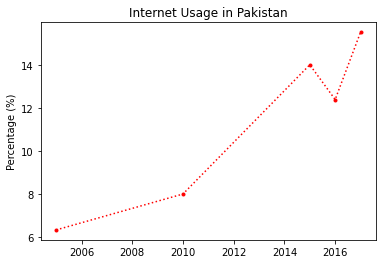

In [10]:
import matplotlib.pyplot as plt

mask = internet['country'] == 'Pakistan'
internet[mask]

plt.ylabel('Percentage (%)') # add y label
plt.title('Internet Usage in Pakistan') # set a title for the chart
plt.plot(internet[mask].year, internet[mask].percentage, color='r', linestyle=':', marker='.')

## Pandas Barchart

The source of this data is United Nations Population Division, New York, World Urbanization Prospects: The 2018 Revision. <br>
For this pandas barchart I am using Population data for the year 2018, more specifically:

- Total Population of a country (y-axis)
- Country (x-axis)


<Figure size 1800x720 with 0 Axes>

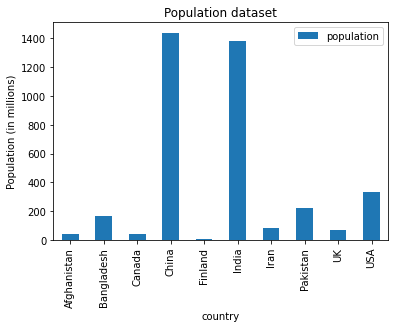

<Figure size 1800x720 with 0 Axes>

In [11]:
df.plot.bar(x = 'country', y = 'population')  #rot = 1 sets labels horizontal
plt.ylabel('Population (in millions)') # y label
plt.title('Population dataset') # Title
plt.figure(figsize = (25, 10))

## Seaborn Scatterplot

The source of this data is United Nations Population Division, New York, World Urbanization Prospects: The 2018 Revision. <br>
For this seaborn scatterplot I am using Population data for the year 2018, more specifically:

- Percentage of Population Living in Rural Areas (x-axis)
- Total population of the country, in millions (y-axis)


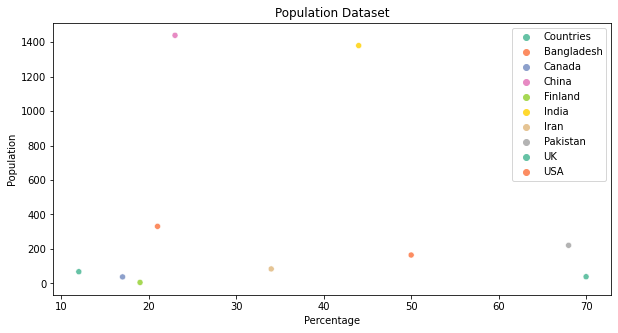

In [12]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,5)

#ax is the axis object!
ax = sns.scatterplot(x='percentage',
                     y='population', 
                     hue='country',  #set color by species 
                     palette='Set2',   #use built-in color palette
                     data=df)
ax.set(xlabel='Percentage', 
       ylabel='Population', 
       title ='Population Dataset')

l = ax.legend()  #set the legend title
l.get_texts()[0].set_text('Countries')